# PRiAD 3 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD3, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

> **Zadanie 1** Napisz funkcję zliczającą brakujące dane w ramce będącej jej argumentem. Funkcja powinna zwracać dwie listy (lub wektory albo słowniki) - pierwsza zawierające liczby braków w kolejnych obiektach (wiersze), druga dla kolejnych atrybutów (kolumny). Oprócz kodu funkcji napisz kod testujący jej działanie.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def countNan(df):
    columns = pd.isnull(df).sum().to_dict()
    rows = {}
    for i in range(len(df.index)) :
        rows.update({str(df.index[i]): df.iloc[i].isnull().sum()})
    return rows, columns


df = pd.DataFrame(np.random.randn(7,5),columns=list('ABCDE'),  index = ['a','b','c','d','e','f','g'])
df.iloc[3,0] = np.nan
df.iloc[3,3] = np.nan
df.iloc[4,2] = np.nan
df.iloc[4,3] = np.nan
df.iloc[1,:] = [np.nan,np.nan,np.nan,np.nan,999]

print(countNan(df))
df

({'a': 0, 'b': 4, 'c': 0, 'd': 2, 'e': 2, 'f': 0, 'g': 0}, {'A': 2, 'B': 1, 'C': 2, 'D': 3, 'E': 0})


,A,B,C,D,E
a,-1.286177,-0.142541,0.582685,-0.524238,0.036819
b,NaN,NaN,NaN,NaN,999.000000
c,0.458187,-1.777884,-1.120146,0.467789,0.408319
d,NaN,-0.521105,-0.269104,NaN,0.551942
e,-0.861589,-0.195414,NaN,NaN,0.399140
f,0.797013,-0.620075,-0.294132,-1.729875,1.989372
g,-1.188945,1.288110,-0.693757,-0.477191,-1.337682


> **Zadanie 2** W pliku `pasazerowie_lot.xls` zawarte są dane o liczbie pasażerów samolotów w latach 2005-16 w państwach należących do Unii Europejskiej oraz z nią stowarzyszonych. Dane pochodzą z [serwisu internetowego EUROSTAT-u](http://ec.europa.eu/eurostat/data/database). Wykonaj następujące zadania:
* wczytaj plik 
* zastanów się, jaka jest najwygodniesza postać ramki danych do dalszego przetwarzania - przekształć dane do tej postaci
* usuń wszystkie obiekty, w których występuje choć jeden brak
* narysuj wykres słupkowy pokazujący łączną liczbę przewiezionych pasażerów z podziałem na lata, słupki powinny być posortowane od najkrótszego (najmniej pasażerów), do najdłuższego (najwięcej przewiezionych pasażerów)
* znajdź państwa o największym i najmniejszym bezwzględnym przyroście liczby pasażerów w całym obserwowanym okresie
* znajdź lata o największym i najmniejszym przyroście liczby pasażerów w Polsce

{'Maximum in country': 'Germany', 'Minimum in country': 'Slovenia'}
{'Polish maximum': '2006', 'Polish minimum': '2009'}


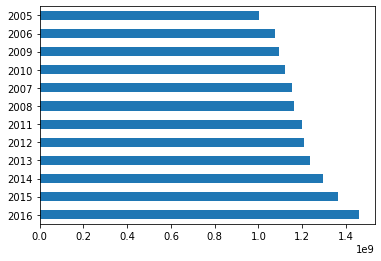

In [118]:
def maxMinInWhichCountry(df):
    df = df['2016'] - df['2005']
    values1 = {'Maximum in country': pd.to_numeric(df).idxmax(), 'Minimum in country': pd.to_numeric(df).idxmin()}
    return values1

def maxMinInPoland(df):
    df1 = pd.to_numeric(df[df.index == 'Poland'].transpose().diff(axis = 0).transpose().iloc[0])
    values2 = {'Polish maximum': df1.idxmax(), 'Polish minimum': df1.idxmin()}
    return values2

df = pd.read_excel('pasazerowie_lot.xls', header = 2, index_col = 0)
df = df.dropna(how = 'any')
df.sum().sort_values(ascending = False).plot(kind = 'barh')

print(maxMinInWhichCountry(df))
print(maxMinInPoland(df))

> **Zadanie 3** Wczytaj dane dowolnego z dwóch plików zawierających kursy walut. Wykorzystujac miary tendencji centralnej oraz miary rozrzutu określ dla każdej waluty w którym półroczu którego roku (rozważ jedynie półrocza, dla których znane są wszystkie kursy) kurs był najwyższy, najniższy (biorąc pod uwagę jego wartość średnią w danym okresie) oraz wykazywał największą zmienność.

In [35]:
w= pd.read_excel('waluty1.xls', header = 0, usecols = {0,1,3,4,5,6})
w.index = pd.to_datetime(w['rok'].map(str) + "-" + w['mies'].map(str))
w = w.dropna(how = 'any')
w_group = w.groupby( ['rok',w['mies']<=6] )
w_mean = w_group.mean()
w_std = w_group.std()
w_mean.rename(index={True:'1 półrocze', False: '2 półrocze'},inplace=True)
w_std.rename(index={True:'1 półrocze', False: '2 półrocze'},inplace=True)

for f in range(1, 5):
        print("Kurs waluty %s \n Najwyższy w: %s, najniższy w: %s, największa zmienność: w %s\n"
              %(w_mean.columns.values[f], w_mean.iloc[:,f].idxmax(), w_mean.iloc[:,f].idxmin(), w_std.iloc[:,f].idxmax()))

Kurs waluty CHF 
 Najwyższy w: (2010, '2 półrocze'), najniższy w: (2008, '1 półrocze'), największa zmienność: w (2008, '2 półrocze')

Kurs waluty USD 
 Najwyższy w: (2009, '1 półrocze'), najniższy w: (2008, '1 półrocze'), największa zmienność: w (2008, '2 półrocze')

Kurs waluty EUR 
 Najwyższy w: (2009, '1 półrocze'), najniższy w: (2008, '1 półrocze'), największa zmienność: w (2008, '2 półrocze')

Kurs waluty JPY 
 Najwyższy w: (2010, '2 półrocze'), najniższy w: (2008, '1 półrocze'), największa zmienność: w (2008, '2 półrocze')



> **Zadanie 4** Zmień nazwę tego skryptu na następującą "PRiAD3zal_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.

*Wersja na rok. akad. 20/21*